<a href="https://colab.research.google.com/github/kaushik3012/fsm-examples/blob/main/FSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Setup
!pip install transitions
!apt-get install graphviz graphviz-dev
!pip install graphviz pygraphviz # install graphviz and/or pygraphviz manually...
!pip install transitions[diagrams]  # ... or install transitions with 'diagrams' extras which currently depends on pygraphviz

import cv2
from google.colab.patches import cv2_imshow

from transitions import Machine
from transitions.extensions import GraphMachine

##FSM for Turnstile

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79428  100 79428    0     0  3693k      0 --:--:-- --:--:-- --:--:-- 3693k


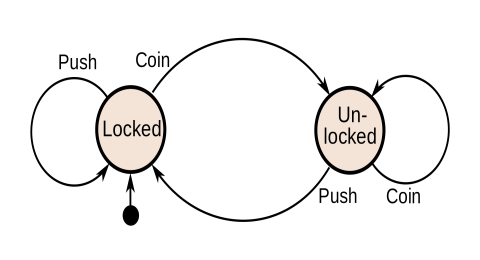

In [ ]:
#@title State transition diagram for the Turnstile
!curl -o turn_fsm.png https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Turnstile_state_machine_colored.svg/1920px-Turnstile_state_machine_colored.svg.png
img = cv2.imread('turn_fsm.png', -1)
resized = cv2.resize(img, (480,260), interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

#####Model Code

In [ ]:
class Turnstile(object):
  states = ['locked', 'unlocked']
  def __init__(self):
    # Initialize the state machine
    self.machine = GraphMachine(model=self, states=Turnstile.states, initial='locked')

    self.machine.add_transition('push', '*', 'locked')
    self.machine.add_transition('coin', '*', 'unlocked')

In [ ]:
turnstile = Turnstile()

In [ ]:
turnstile.state

'locked'

In [ ]:
turnstile.push()
turnstile.state

'locked'

In [ ]:
turnstile.coin()
turnstile.state

'unlocked'

In [ ]:
turnstile.push()
turnstile.state

'locked'

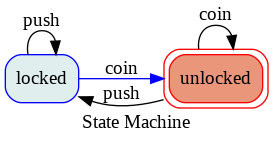

In [ ]:
#@title State Diagram of Turnstile produced using graphviz
turnstile.get_graph().draw('turnstile_state_diagram.png', prog='dot')
Timg = cv2.imread('turnstile_state_diagram.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(Timg)

## ATM Machine

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12988  100 12988    0     0  32389      0 --:--:-- --:--:-- --:--:-- 32470


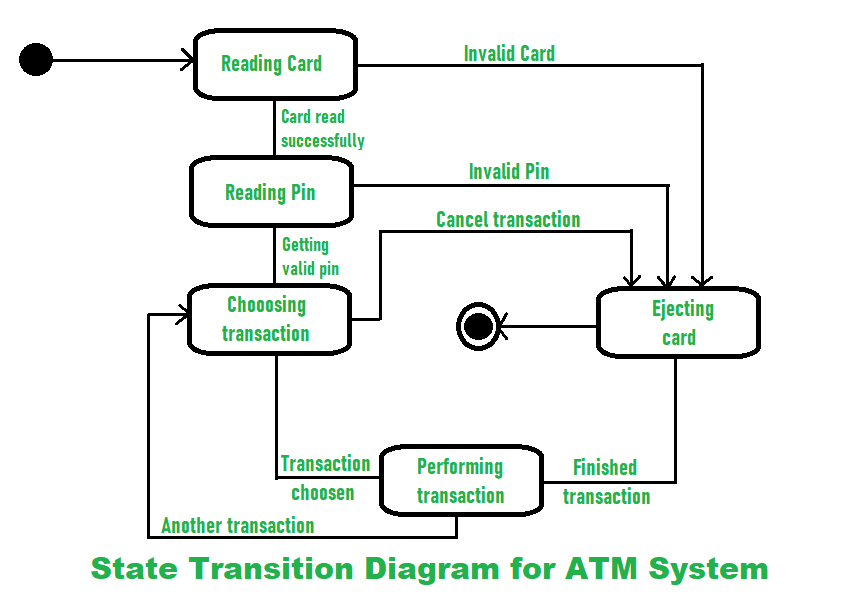

In [ ]:
#@title State transition diagram for the ATM machine
!curl -o atm_fsm.png https://media.geeksforgeeks.org/wp-content/uploads/20200618233359/Untitled641.png
img = cv2.imread('atm_fsm.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

#####Model Code

In [ ]:
class ATM(object):
  states = ['idle', 'Reading Card', 'Reading Pin', 'Choosing Transaction', 'Performing Transaction', 'Ejecting Card']

  def __init__(self):
    self.machine = GraphMachine(model=self, states=ATM.states, initial='idle')

    self.machine.add_transition('insert_card', 'idle', 'Reading Card')
    self.machine.add_transition('insert_card', 'Reading Card', 'Ejecting Card')
    self.machine.add_transition('valid_card', 'Reading Card', 'Reading Pin')
    self.machine.add_transition('invalid_pin', 'Reading Pin', 'Ejecting Card')
    self.machine.add_transition('valid_pin', 'Reading Pin', 'Choosing Transaction')
    self.machine.add_transition('cancel_transaction', 'Choosing Transaction', 'Ejecting Card')
    self.machine.add_transition('transaction_chosen', 'Choosing Transaction', 'Performing Transaction')
    self.machine.add_transition('another_transaction', 'Performing Transaction', 'Choosing Transaction')
    self.machine.add_transition('finished_transaction', 'Performing Transaction', 'Ejecting Card')
    self.machine.add_transition('logout', 'Ejecting Card', 'idle')

In [ ]:
atm = ATM()
atm.state

'idle'

In [ ]:
atm.insert_card()
atm.state

'Reading Card'

In [ ]:
atm.valid_card()
atm.state

'Reading Pin'

In [ ]:
atm.valid_pin()
atm.state

'Choosing Transaction'

In [ ]:
atm.transaction_chosen()
atm.state

'Performing Transaction'

In [ ]:
atm.finished_transaction()
atm.state

'Ejecting Card'

In [ ]:
atm.logout()
atm.state

'idle'

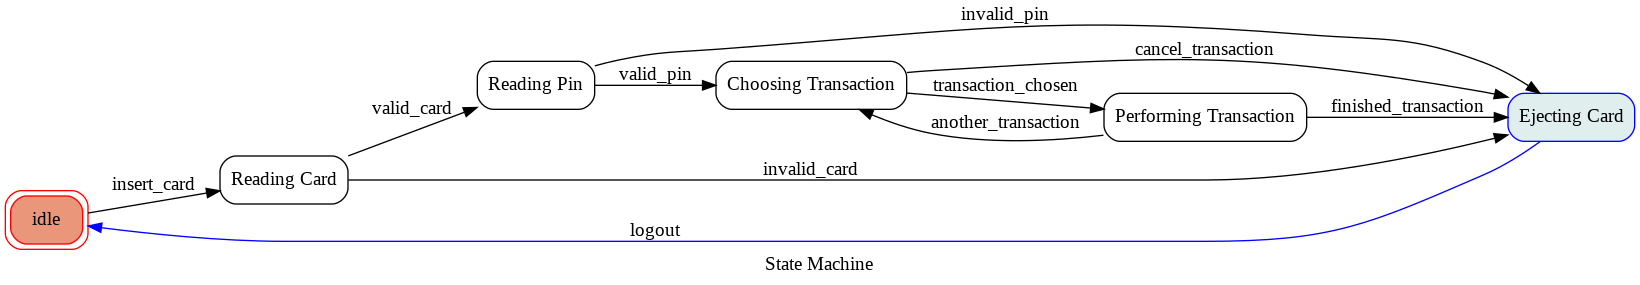

In [ ]:
#@title State Diagram of ATM produced using graphviz
atm.get_graph().draw('ATM_state_diagram.png', prog='dot')
Aimg = cv2.imread('ATM_state_diagram.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(Aimg)

##Vending Machine

In [ ]:
#@title State transition diagram for the Vending Machine
!curl -o vend_fsm.jpg https://slideplayer.com/slide/13005072/79/images/3/State+Diagram+of+a+Simple+Soda+Vending+Machine.jpg
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('vend_fsm.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

#####Model Code

In [ ]:
class vending_machine(object):

  states = ['idle', 'Count Coins', 'Give Change', 'Select Soda', 'Dispense Soda']
  drinks = ['Coca Cola', 'Pepsi', 'Thumbs Up', 'Sprite', 'Red Bull']
  amount = 0
  choice = 0

  def accept_coins(self, amount=0):
    self.amount = amount
  
  def is_valid(self):
    if(self.amount<15):
      print("Money not Enough!\n")
      print("Insert Coins again\n")
      return False
    print("Insertion Successful!\n")
    print("No Money Ejected!\n")
    return True

  def select_soda(self):

    while(1):
      print("Choose a Drink from following:\n")
      for i in range(len(self.drinks)):
        print('(',i+1, ')', self.drinks[i],' ')
      print('\n')
      self.choice = int(input())
      if(self.choice<=len(self.drinks) and self.choice>=1):
        break
      else:
        print("Wrong Choice Entered, Choose again!\n")

  def dispensed(self):
    print("Your ", self.drinks[self.choice-1], " dispensed successfully!\n")
    print("Thank You!\n")
          

  def __init__(self):
    self.machine = GraphMachine(model=self, states=vending_machine.states, initial='idle')

    self.machine.add_transition('insert_coins', 'idle', 'Count Coins', before='accept_coins')
    self.machine.add_transition('reject_coins', 'Count Coins', 'Give Change', unless='is_valid')
    self.machine.add_transition('cancel', '*', 'Give Change')
    self.machine.add_transition('proceed', 'Count Coins', 'Select Soda')
    self.machine.add_transition('proceed', 'Select Soda','Dispense Soda',before='select_soda', after='dispensed')
    self.machine.add_transition('shutdown', '*', 'idle')

In [ ]:
vMach = vending_machine()
vMach.state

'idle'

In [ ]:
vMach.insert_coins(16)
vMach.state


'Count Coins'

In [ ]:
vMach.reject_coins()
vMach.state

Insertion Successful!

No Money Ejected!



'Count Coins'

In [ ]:
vMach.proceed()
vMach.state

'Select Soda'

In [ ]:
vMach.proceed()
vMach.state

Choose a Drink from following:

( 1 ) Coca Cola  
( 2 ) Pepsi  
( 3 ) Thumbs Up  
( 4 ) Sprite  
( 5 ) Red Bull  


5
Your  Red Bull  dispensed successfully!

Thank You!



'Dispense Soda'

In [ ]:
vMach.shutdown()
vMach.state

'idle'

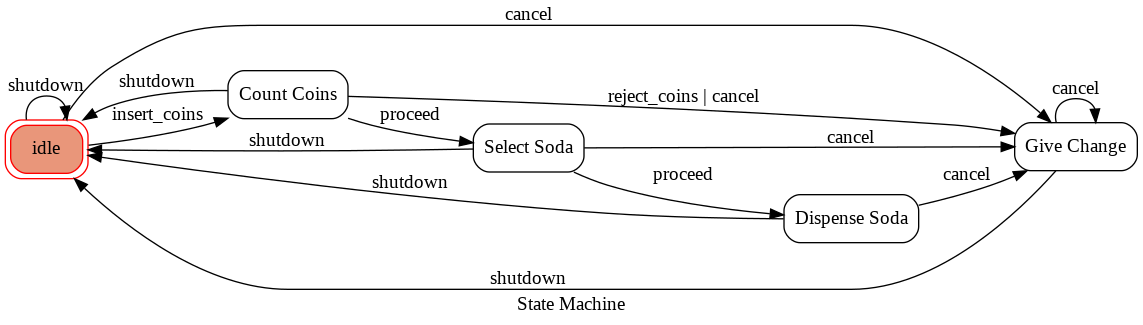

In [ ]:
#@title State Diagram of Vending Machine produced using graphviz
vMach.get_graph().draw('vending_state_diagram.png', prog='dot')
Vimg = cv2.imread('vending_state_diagram.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(Vimg)